In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
import regex as re
import itertools

In [ ]:
data = []
Sample_size = 5
for i in range(4):
  path = "/content/drive/MyDrive/FOC/Project_2/dblp-ref-"+str(i)+".json"
  chunks = pd.read_json(path, lines=True, chunksize = 100000)
  for chunk in chunks:
    data.append(chunk)
    break
data = pd.concat(data)
df_sample = data.sample(Sample_size,random_state = 10221992)

Known_Authors_Graph

Author non unique count 14
Author unique count 14
Repeating Values : {}


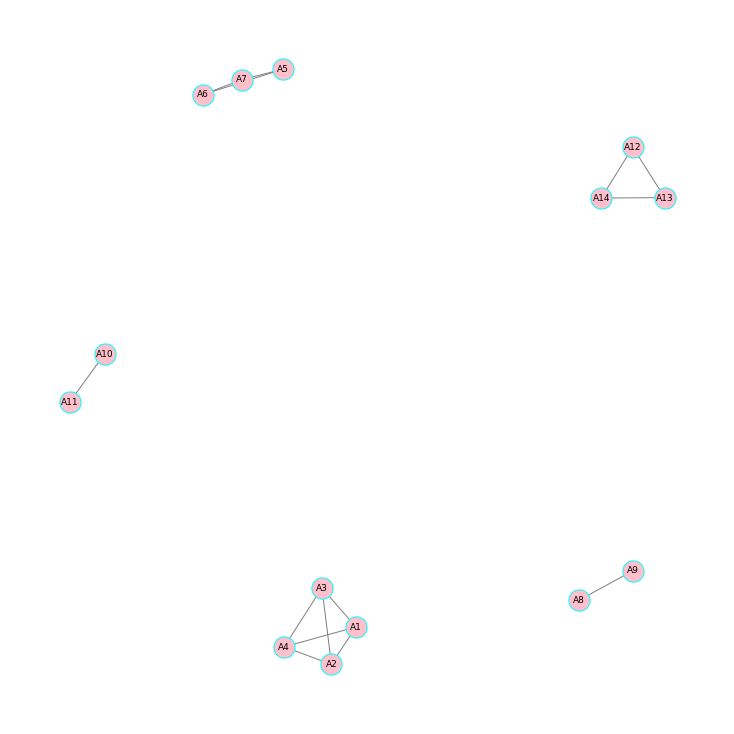

Nodes of graph: 
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14']
Edges of graph: 
[('A1', 'A2'), ('A1', 'A3'), ('A1', 'A4'), ('A2', 'A3'), ('A2', 'A4'), ('A3', 'A4'), ('A5', 'A6'), ('A5', 'A7'), ('A6', 'A7'), ('A8', 'A9'), ('A10', 'A11'), ('A12', 'A13'), ('A12', 'A14'), ('A13', 'A14')]
The Number of Cliques of size 3 : 6
The Number of Cliques of size 4 : None
The Number of Cliques of size 5 : None
The Number of Cliques of size 6 : None
The Number of Cliques of size 7 : None


In [ ]:
author_unique=df_sample['authors'].explode().unique()
print("Author non unique count", len(df_sample['authors'].explode()))
print("Author unique count", len(author_unique))
author_var=['A{}'.format(i) for i in range(1,len(author_unique)+1)]
author_dictionary=dict(zip(author_unique,author_var))
df_sample["Author_Prefix"]=df_sample["authors"].apply(lambda x: pd.Series(x).map(author_dictionary).tolist())
author_lst = df_sample['Author_Prefix'].tolist()
x = list(df_sample['Author_Prefix'].explode())
Repeats = {}
frequency = {p:x.count(p) for p in x}
for key, val in frequency.items():
  if val > 1:
    Repeats[key] = val
  else:
    pass
print('Repeating Values :', Repeats)
Graph1_Dict = {}
for i in author_lst:
  for z in i:
    if z not in Graph1_Dict.keys():
      Graph1_Dict[z] = [x for x in i if x != z]
    else:
      a = [x for x in i if x != z]
      Graph1_Dict[z] = Graph1_Dict[z] + [item for item in a if item not in Graph1_Dict[z]]
g = nx.Graph(Graph1_Dict)
g.remove_edges_from(nx.selfloop_edges(g))
plt.rcParams["figure.figsize"] = (10,10)
pos = nx.spring_layout(g,k=.5)
nx.draw(g,pos, with_labels = True,font_size = 9, node_size = 450, node_color = 'pink',edgecolors='cyan', edge_color='grey')
plt.show()
print("Nodes of graph: ")
print(g.nodes())
print("Edges of graph: ")
print(g.edges())
edges = []
for i in g.edges():
  a=list(re.findall('\d+',str(i)))
  edges.append((int(a[0]),int(a[1])))
with open(r'/content/drive/MyDrive/FOC/Project_2/author_edge_list.txt', 'w') as fp:
    for item in edges:
        fp.writelines(str(item[0])+','+ str(item[1])+'\n')
def find_cliques_size_k(g, k):
 count = 0
 for clique in nx.find_cliques(g):
        if len(clique) == k:
            count += 1
        elif len(clique) > k:
           count += len(list(itertools.combinations(clique, k)))
  return count

print('The Number of Cliques of size 3 :', find_cliques_size_k(g, 3))
print('The Number of Cliques of size 4 :', find_cliques_size_k(g, 4))
print('The Number of Cliques of size 5 :', find_cliques_size_k(g, 5))
print('The Number of Cliques of size 6 :', find_cliques_size_k(g, 6))
#print('The Number of Cliques of size 7 :', find_cliques_size_k(g, 7))

Paper_Citation_graph

Reference Count : 61
Reference Count after dropping Nan: 60
Paper ID count which is unique : 65
Paper ID count which is not unique : 65
Repeating Values : {}
The Count of Keys with Nan values : 5
The Count of Keys without Nan values : 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


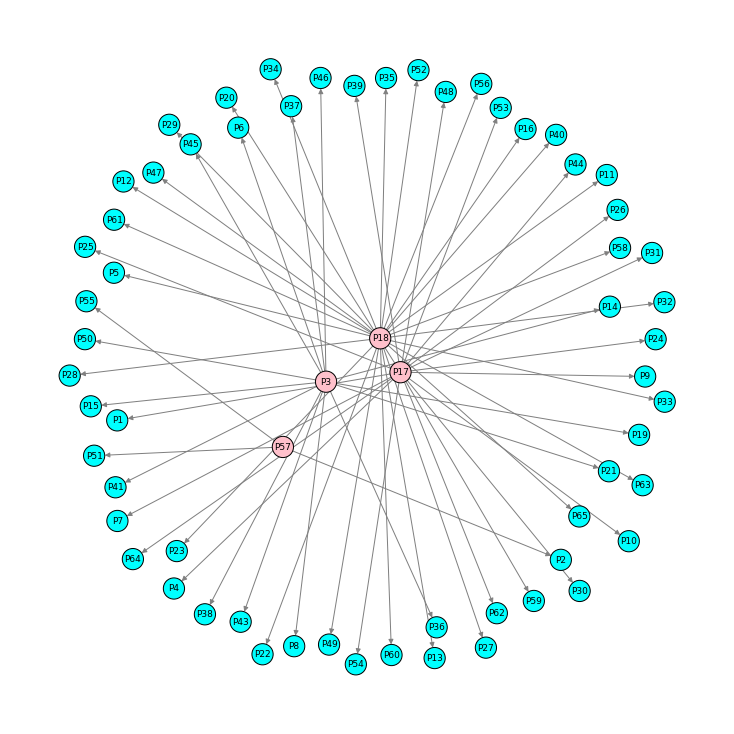

Nodes of graph: 
['P17', 'P18', 'P3', 'P57', 'P31', 'P64', 'P59', 'P53', 'P7', 'P25', 'P9', 'P10', 'P48', 'P39', 'P1', 'P30', 'P62', 'P20', 'P26', 'P44', 'P54', 'P4', 'P24', 'P49', 'P35', 'P47', 'P63', 'P61', 'P5', 'P22', 'P58', 'P27', 'P40', 'P60', 'P28', 'P13', 'P52', 'P11', 'P32', 'P33', 'P16', 'P56', 'P34', 'P23', 'P12', 'P65', 'P29', 'P50', 'P45', 'P21', 'P46', 'P8', 'P36', 'P37', 'P43', 'P14', 'P6', 'P38', 'P15', 'P19', 'P41', 'P2', 'P51', 'P55']
Edges of graph: 
[('P17', 'P31'), ('P17', 'P64'), ('P17', 'P59'), ('P17', 'P53'), ('P17', 'P7'), ('P17', 'P25'), ('P17', 'P9'), ('P17', 'P10'), ('P17', 'P48'), ('P17', 'P39'), ('P17', 'P1'), ('P17', 'P30'), ('P17', 'P62'), ('P17', 'P20'), ('P17', 'P26'), ('P17', 'P44'), ('P17', 'P54'), ('P17', 'P4'), ('P17', 'P24'), ('P18', 'P49'), ('P18', 'P35'), ('P18', 'P47'), ('P18', 'P63'), ('P18', 'P61'), ('P18', 'P5'), ('P18', 'P22'), ('P18', 'P58'), ('P18', 'P27'), ('P18', 'P40'), ('P18', 'P60'), ('P18', 'P28'), ('P18', 'P13'), ('P18', 'P52'), ('

In [ ]:
reference_unique = list(df_sample['references'].explode().unique())
print('Reference Count :',len(reference_unique))
for i in reference_unique:
  if str(i) == 'nan' or str(i) == 'NaN' or str(val) == '[]':
    reference_unique.remove(i)
  else:
    pass
print('Reference Count after dropping Nan:',len(reference_unique))
paper_id_unique = list(set(reference_unique + df_sample['id'].to_list()))
paper_id_non_unique = reference_unique + df_sample['id'].to_list()
paper_var=['P{}'.format(i) for i in range(1,len(paper_id_unique)+1)]
print("Paper ID count which is unique :",len(paper_id_unique))
print("Paper ID count which is not unique :", len(paper_id_non_unique))
x = paper_id_non_unique
Repeats = {}
frequency = {p:x.count(p) for p in x}
for key, val in frequency.items():
  if val > 1:
    Repeats[key] = val
  else:
    pass
print('Repeating Values :', Repeats)
para_var=dict(zip(paper_id_unique,paper_var))
df_sample["Reference_Prefix"]   =  df_sample["references"].apply(lambda x: pd.Series(x).map(para_var).to_list())
df_sample["Id_Prefix"]=df_sample["id"].apply(lambda x: pd.Series(x).map(para_var))
Graph2_Dict =dict(zip(df_sample['Id_Prefix'],df_sample['Reference_Prefix']))
print('The Count of Keys with Nan values :',len(Graph2_Dict.keys()))
new_Graph2_Dict = {}
for key, val in Graph2_Dict.copy().items():
  if str(val) == '[]' or str(val) == '[nan]':
    del Graph2_Dict[key]
  else:
    pass
print('The Count of Keys without Nan values :', len(Graph2_Dict.keys()))
g = nx.DiGraph(Graph2_Dict)
g.remove_edges_from(nx.selfloop_edges(g))
plt.rcParams["figure.figsize"] = (10,10)
color_map = ["pink" if node in Graph2_Dict.keys() else "cyan" for node in g]
nx.draw(g, with_labels = True,font_size = 9, node_size = 450, node_color = color_map, edgecolors='black', edge_color='grey')
plt.show()
print("Nodes of graph: ")
print(g.nodes())
print("Edges of graph: ")
print(g.edges())
edges = []
for i in g.edges():
  a=list(re.findall('\d+',str(i)))
  edges.append((int(a[0]),int(a[1])))
with open(r'/content/drive/MyDrive/FOC/Project_2/reference_id_edge_list.txt', 'w') as fp:
    for item in edges:
        fp.writelines(str(item[0])+','+ str(item[1])+'\n')
d = nx.in_degree_centrality(g)
Top=[]
for w in sorted(d, key=d.get, reverse=True):
    Top.append(w)
Top = Top[0:10]
temp = {j:i for i,j in para_var.items()}
print('Top 10 most cited papers :')
for i in Top:
  print( temp[i])

Author-Venue-Graph

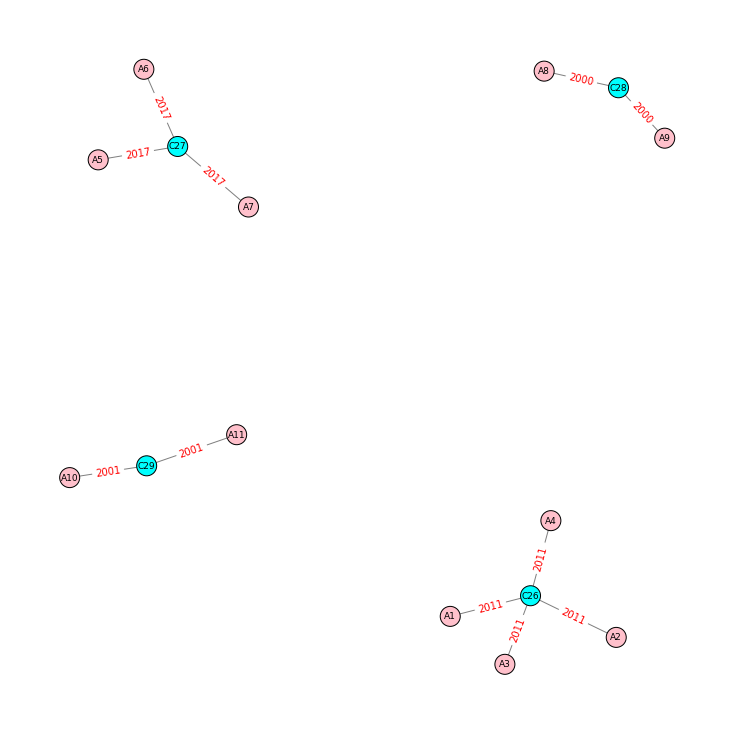

Nodes of graph: 
['C26', 'C27', 'C28', 'C29', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11']
Edges of graph: 
[('C26', 'A1'), ('C26', 'A2'), ('C26', 'A3'), ('C26', 'A4'), ('C27', 'A5'), ('C27', 'A6'), ('C27', 'A7'), ('C28', 'A8'), ('C28', 'A9'), ('C29', 'A10'), ('C29', 'A11')]


In [ ]:
unique_venue = df_sample['venue'].unique().tolist()
for i in unique_venue:
  if i == '' or str(i) == 'NaN':
    unique_venue.remove(i)
  else:
    pass
venue_var=['C{}'.format(i + Sample_size*5) for i in range(1,len(unique_venue)+1)]
venue_dictionary=dict(zip(unique_venue,venue_var))
df_sample["Venue_Prefix"]=df_sample['venue'].apply(lambda x: pd.Series(x).map(venue_dictionary))
venue_author_dicionary=dict(zip(df_sample['Venue_Prefix'], df_sample['Author_Prefix']))
for i in venue_author_dicionary.copy():
  if type(i) == float:
    venue_author_dicionary.pop(i)
g = nx.Graph(venue_author_dicionary)
g.remove_edges_from(nx.selfloop_edges(g))
plt.rcParams["figure.figsize"] = (10,10)
color_map = ["cyan" if node in venue_author_dicionary.keys() else "pink" for node in g]
venue_year = dict(zip(df_sample['Venue_Prefix'], df_sample['year']))
edge_labeled = {}
pos = nx.spring_layout(g,k=.45)
for edge in g.edges():
  if edge[0] in venue_year.keys():
    edge_labeled[edge] = venue_year[edge[0]]
  else:
    pass
nx.draw(g,pos, with_labels = True,font_size = 9, node_size = 400, node_color = color_map,  edgecolors='black', edge_color='grey')
nx.draw_networkx_edge_labels(g,pos, edge_labels= edge_labeled, font_color='red')
plt.show()
print("Nodes of graph: ")
print(g.nodes())
print("Edges of graph: ")
print(g.edges())
edges = []
for i in g.edges():
  a=list(re.findall('\d+',str(i)))
  edges.append((int(a[0]),int(a[1])))
with open(r'/content/drive/MyDrive/FOC/Project_2/author_venue_edge_list.txt', 'w') as fp:
    for item in edges:
        fp.writelines(str(item[0])+','+ str(item[1])+'\n')